## 1.Veri Setinin Hazırlanması

In [1]:
# Kütüphaneler eklendi
import numpy as np # linear algebra
#Python programlama dili için büyük, çok boyutlu dizileri ve matrisleri destekleyen, bu diziler üzerinde çalışacak üst düzey matematiksel işlevler ekleyen bir kitaplıktır.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Veri işlemesi ve analizi için Python programlama dilinde yazılmış olan bir yazılım kütüphanesidir.
# Bu kütüphane temel olarak zaman etiketli serileri ve sayısal tabloları işlemek için bir veri yapısı oluşturur ve bu şekilde çeşitli işlemler bu veri yapısı üzerinde gerçekleştirilebilir olur.

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


In [2]:
# Veri Setinin dahil edilmesi.
# Veriler başka bir yerden alınacaksa read_csv() metodu kullanılır.
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv")
# Asıl verileri korumak için kopya üzerinde çalışmayı unutma!
df = df_.copy()
#print(df)

In [3]:
# Rastgele veri eksiltmesi yapılıyor.
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random= 42) -> pd.DataFrame: 
# DataFrame,etiketli eksenlere (satırlar ve sütunlar) sahip iki boyutlu,boyut değiştirilebilir,potansiyel olarak heterojen tablo veri yapısıdır.
#seed komutu eksiltilen random değerlerin sabit kalmasını sağlıyor.
#missing_rate eksiltilecek verinin % değerini girmek için kullanıldı.%2 i eksiltilecek
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format.

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()
   

    # Obtain size of dataframe and number total number of missing values
    # Veri çerçevesinin boyutunu ve eksik değerlerin toplam sayısını elde edin
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    # NaN'a dönüştürmek için rastgele satır ve sütun dizinleri alın
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
    #randint() metodu belirtilen aralıktan seçilen bir tam sayı öğesini döndürür.
    #shape() metodu Bir DataFrame durumunda, tuple satır ve sütun miktarını gösterir.
    #shape[0] satır sayısını,shape[1] sütun sayısını verir
        col_idx = random.randint(0, dataframe.shape[1] - 1)
    #bu kod rastgele bir sütun indeksini seçmek için kullanılır. Seçilen indeks, DataFrame'deki sütunlardan birine erişmek veya işlemler yapmak amacıyla kullanılabilir.

        df_missing.iat[row_idx, col_idx] = np.nan
    #iat[] tam olarak satır ve sütun indeksini kullanarak bir hücreye doğrudan erişim sağlar.
    

    return df_missing
    

## 2.Veri Setine Genel Bakış

In [4]:
# print("Veri setinin ilk 3 gözlemi= \n",df.head(3)) # İlk 3 satırı görüntüleyelim, satırdeğerleri alt satırdan devam ettiği için bilgi okumak zorlaşıyor.
df.head(n = 5) #ilk 5 satır görüntülenir bilgiler matris şeklinde olduğundan veri okuma daha kolay

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
df.info()  # Veri tipi ve eksik değer bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

Veri setinin ham halinde, kolonların veri tipleri her zaman olması gerektiği haliyle olmayabilir. Kategorik ve numerik kolonları ayırırken öncelikle her değişkenin doğru veri tipinde olduğundan emin olmalısınız.

In [6]:
categorical_features = []
numerical_features = []

categorical_features = [col for col in df.columns if (df[col].dtype == "object") or (df[col].dtype == "categorical")]
numerical_features = [col for col in df.columns if (df[col].dtype != "object") and (df[col].dtype != "categorical")]

#List comprehension for döngüsü ile yapılan işlemleri tek satırda yapmanızı sağlar.

In [7]:
categorical_features,numerical_features

(['Timestamp',
  'Source IP Address',
  'Destination IP Address',
  'Protocol',
  'Packet Type',
  'Traffic Type',
  'Payload Data',
  'Malware Indicators',
  'Alerts/Warnings',
  'Attack Type',
  'Attack Signature',
  'Action Taken',
  'Severity Level',
  'User Information',
  'Device Information',
  'Network Segment',
  'Geo-location Data',
  'Proxy Information',
  'Firewall Logs',
  'IDS/IPS Alerts',
  'Log Source'],
 ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'])

In [8]:
df['Severity Level'][:10] #ilk 10 gözlemin ciddiyet seviyelerini yazdırdık

0       Low
1       Low
2       Low
3    Medium
4       Low
5    Medium
6      High
7      High
8      High
9    Medium
Name: Severity Level, dtype: object

In [9]:
df.describe()  # Sayısal kolonlar hakkında özet istatistikler

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


## 3.Eksik Veri Analizi

In [10]:
df.isna().sum() # isna() => her hücredeki eksik değeri (NaN) kontrol eder ve True/False değeri döndürür.
#sum() => (NaN) değerlerin sayısını verir.

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % sini hesaplayalım.

In [11]:
kayip_veri = df.isna().sum() 

toplam_kayit = len(df)

# Eksik değer yüzdesini hesaplayalım
kayip_yuzdeleri = (kayip_veri / toplam_kayit)*100

print(kayip_yuzdeleri)

Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64


Veri setindeki toplam eksik değer sayısını görelim.

In [12]:
df.isna().sum().sum()

99929

In [13]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

Timestamp                 40000
Source IP Address         40000
Destination IP Address    40000
Source Port               40000
Destination Port          40000
Protocol                  40000
Packet Length             40000
Packet Type               40000
Traffic Type              40000
Payload Data              40000
Malware Indicators        20000
Anomaly Scores            40000
Alerts/Warnings           19933
Attack Type               40000
Attack Signature          40000
Action Taken              40000
Severity Level            40000
User Information          40000
Device Information        40000
Network Segment           40000
Geo-location Data         40000
Proxy Information         20149
Firewall Logs             20039
IDS/IPS Alerts            19950
Log Source                40000
dtype: int64

In [14]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")
# isnull => her bir değeri kontrol eder ve eksik (NaN) değerler için True, diğer değerler için ise False döndürür.
# notnull => NaN olmayan hücreler için True, NaN olan hücreler için False döndürür.

Veri seti içerisinde toplam 900071 adet eksik olmayan, 99929 eksik gözlem var.


In [15]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
missing_data = df[df.isnull().any(axis = 1)] #axis=1 parametresi, satırlar boyunca kontrol yapmamızı sağlar. Eğer axis=0 olsaydı, sütunlar boyunca kontrol yapılırdı.

In [16]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:3]

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
46,2023-05-16 13:01:56,170.211.138.30,172.97.181.148,25022,6593,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,...,Blocked,High,Aradhya Kamdar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_3 like M...,Segment A,"Amravati, Kerala",95.170.137.42,Log Data,Alert Data,Firewall


/tmp/ipykernel_17/260043083.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=45, ha='right')  # `rotation=45` ile 45 derece döndürme


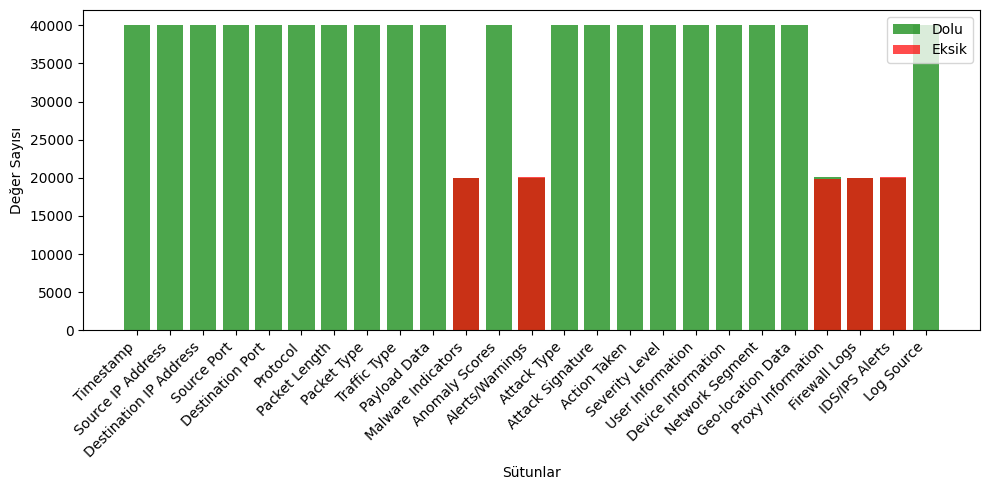

In [17]:
#missingno (kısaca msno) Python kütüphanesi, eksik verileri görselleştirmeye yarayan çok faydalı bir araçtır.
import missingno as msno

fig, ax = plt.subplots(figsize=(10, 5))

# Dolu veriler için yeşil, eksik veriler için kırmızı
df_notnull = df.notnull()
df_isnull = df.isnull()

# Çubuk grafik: Dolu veriler için yeşil, eksik veriler için kırmızı
ax.bar(df.columns, df.notnull().sum(), color='green', alpha=0.7, label='Dolu')
ax.bar(df.columns, df.isnull().sum(), color='red', alpha=0.7, label='Eksik')

# Grafik özellikleri
ax.set_xlabel('Sütunlar')
ax.set_ylabel('Değer Sayısı')
ax.legend()

# Sütun isimlerini döndürmek
ax.set_xticklabels(df.columns, rotation=45, ha='right')  # `rotation=45` ile 45 derece döndürme

plt.tight_layout()  # Grafik öğelerinin sığması için sıkıştırma

plt.show()


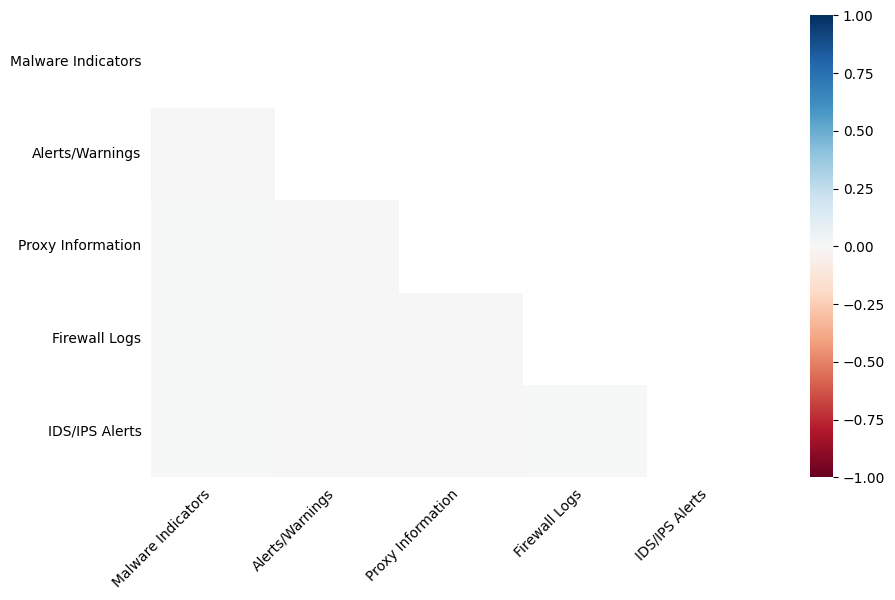

In [18]:
# msno.heatmap() => hangi sütunların eksik veriler bakımından benzer olduğunu anlamanıza yardımcı olur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

Eksik verilerin Silinmesi

In [19]:
# # Eksik verilerin dropna ile silinmesi.
# # Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace=true argümanı kullanılmalı veya atama yapılmalıdır.

# df.dropna(inplace = False)[:5]
# #df = df.dropna() temizlenmiş veri çerçevesini orijinal df ye atar,bu asıl verilerin kaybolmasına neden olur


In [20]:
# # Bütün hücreleri eksik olan (NaN) satırları kontrol etme
# all_missing = df.isna().all(axis=1)

# # Tüm değerleri eksik olan satırları yazdırma
# missing_rows = df[all_missing]

# # Eğer eksik veri içeren satırlar varsa
# if not missing_rows.empty:
#     print("\n*** Bütün Değerleri Eksik Olan Satırlar ***")
#     missing_rows
# else:
#     print("\n*** Bütün Değerleri Eksik Olan Satır Yok ***")



In [21]:
# # # Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
# # df.dropna(how = 'all')[:5]

# # Her satırda NaN değerlerinin sayısını görmek
# nan_count_per_row = df.isna().sum(axis=1)

# # Satırları NaN değerlerine göre filtreleme
# rows_with_nan = df[nan_count_per_row > 0]

# # İlk 5 satırdaki NaN değerlerini yazdırma
# rows_with_nan.head(5)

In [22]:
# # NaN içeren sütunların isimleri ve eksik veri sayıları
# nan_info = df.isna().sum()

# # NaN içeren sütunlar (sayısı > 0)
# nan_columns = nan_info[nan_info > 0]

# # Eksik verisi olan sütunların veri tiplerini almak
# nan_column_types = df[nan_columns.index].dtypes

# # Sütun isimleri, eksik veri sayıları ve veri tiplerini birleştirip yazdırma
# nan_info_with_types = pd.DataFrame({
#     'Eksik Veri Sayısı': nan_columns,
#     'Veri Tipi': nan_column_types
# })

# # Sonuçları yazdırma
# print("\nEksik Verisi Olan Sütunlar, Veri Tipleri ve NaN Sayısı:")
# nan_info_with_types.head(15)

In [23]:
# # Eksik verilerin dropna ile silinmesi.

# df.dropna(inplace = False)[:5]


In [24]:
# # Silmeden önce satır sayısını kontrol etme
# print("Silmeden önce satır sayısı:", len(df))

# # Eksik verileri silme
# df_cleaned = df.dropna(inplace=False)

# # Silmeden sonra satır sayısını kontrol etme
# print("Silindikten sonra satır sayısı:", len(df_cleaned))

In [25]:
# # Silmeden önce NaN içeren satırlar
# rows_with_nan_before = df[df.isna().any(axis=1)]

# # Silmeden sonra NaN içeren satırlar
# rows_with_nan_after = df_cleaned[df_cleaned.isna().any(axis=1)]

# # Silinen satırları görmek
# deleted_rows = rows_with_nan_before[~rows_with_nan_before.index.isin(rows_with_nan_after.index)]

# # Silinen satırları yazdırma
# print("\nSilinen Satırlar:")
# deleted_rows.head(5)

Eksik Verilerin Doldurulması

In [26]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall


In [27]:
# Kategorik sütunlardaki NaN değerlerini mod ile doldurma (Asıl veriler kaybolmaz)
for column in df_fillna.columns:
    if df_fillna[column].dtype == 'object':  # Yalnızca kategorik sütunlarda işlemi uygula
        mode_value = df_fillna[column].mode()[0]  # En yaygın değeri bul
        # NaN olan hücreleri yalnızca mod ile doldur
        df_fillna[column] = df_fillna[column].fillna(mode_value)

# Doldurulmuş veri çerçevesinin ilk 3 satırını yazdırma
print("\nİlk 3 Satır (Eksik Veriler Mod ile Doldurulmuş):")
df_fillna.head(3)


İlk 3 Satır (Eksik Veriler Mod ile Doldurulmuş):


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Alert Data,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",39.123.165.122,Log Data,Alert Data,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall


In [28]:
# NaN olan her sütundaki eksik değer sayısını kontrol etme
print("\nNaN İçeren Sütunlar:")
df_fillna.isna().sum()


NaN İçeren Sütunlar:


Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,40000.0,32970.356450,18560.425604,1027.0,16850.75,32856.000,48928.25,65530.0
Destination Port,40000.0,33150.868650,18574.668842,1024.0,17094.75,33004.500,49287.00,65535.0
Packet Length,40000.0,781.452725,416.044192,64.0,420.00,782.000,1143.00,1500.0
Anomaly Scores,40000.0,50.113473,28.853598,0.0,25.15,50.345,75.03,100.0


## 4.Kategorik Değişken Analizi.

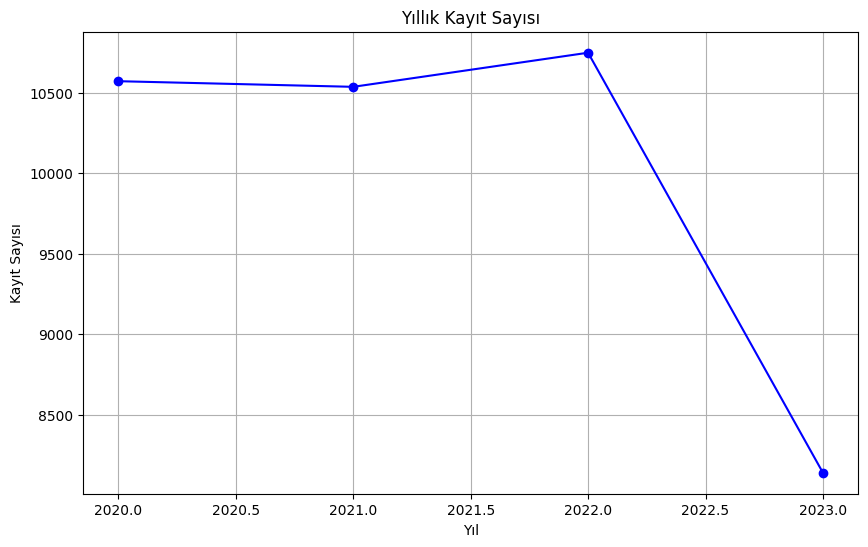

In [30]:
# Zaman sütununu datetime formatına çevirme
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Zaman serisinin yıllık toplamını alalım
df['Year'] = df['Timestamp'].dt.year

# Yıllık kayıt sayısını hesaplayalım
yearly_counts = df['Year'].value_counts().sort_index()

# Zaman serisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title('Yıllık Kayıt Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Kayıt Sayısı')
plt.grid(True)
plt.show()

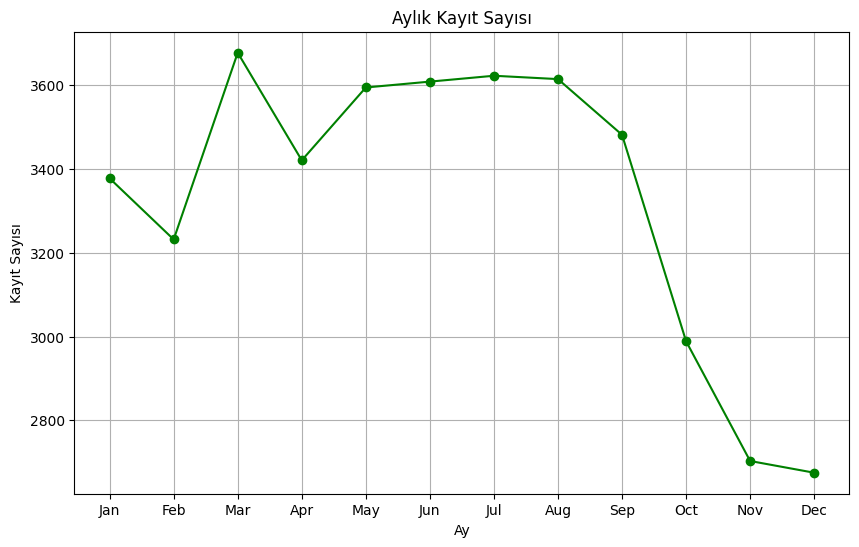

In [31]:
# Aylık kayıt sayısını hesaplama
df['Month'] = df['Timestamp'].dt.month
monthly_counts = df['Month'].value_counts().sort_index()

# Aylık zaman serisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='g')
plt.title('Aylık Kayıt Sayısı')
plt.xlabel('Ay')
plt.ylabel('Kayıt Sayısı')
plt.grid(True)
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

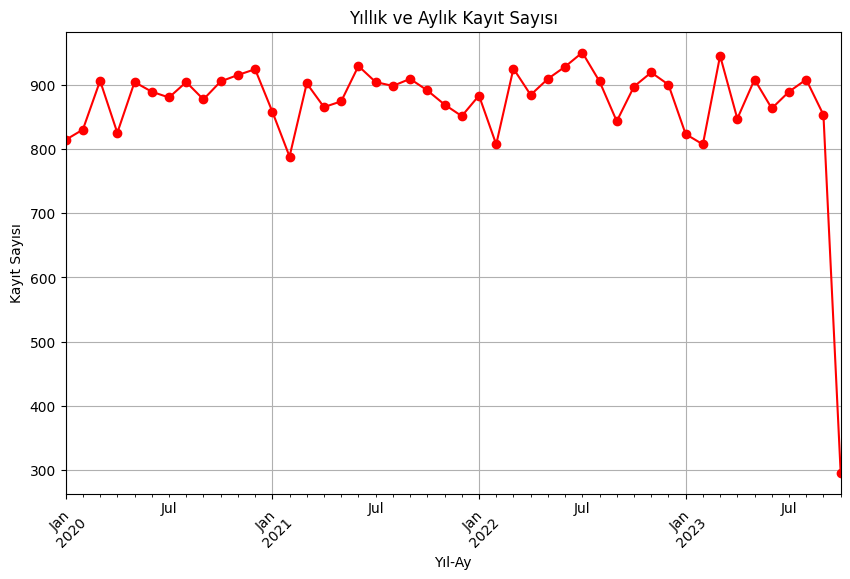

In [32]:
# Yıl ve ay kombinasyonu ile kayıt sayısını hesaplayalım
df['Year-Month'] = df['Timestamp'].dt.to_period('M')
monthly_counts = df.groupby('Year-Month').size()

# Zaman serisinin yıllık ve aylık bileşenlerini görselleştirelim
plt.figure(figsize=(10, 6))
monthly_counts.plot(marker='o', linestyle='-', color='r')
plt.title('Yıllık ve Aylık Kayıt Sayısı')
plt.xlabel('Yıl-Ay')
plt.ylabel('Kayıt Sayısı')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

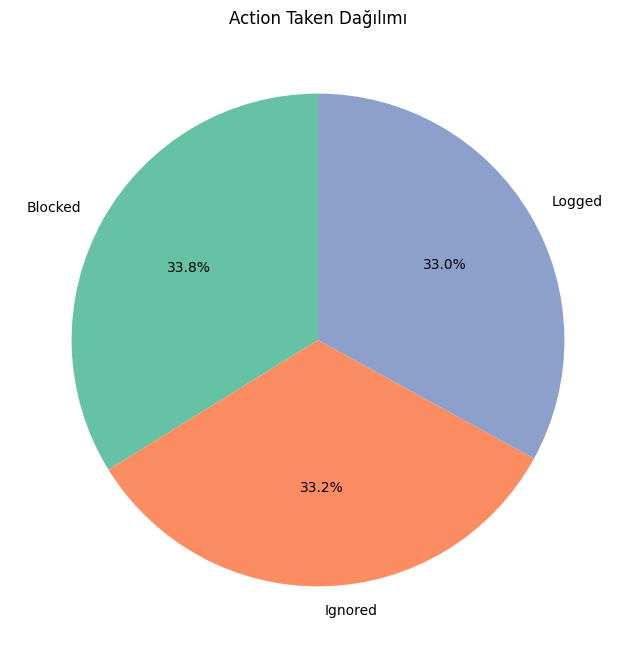

In [33]:
# Pie chart ile kategorik veri dağılımı
column = 'Action Taken'

# Kategorik değerlerin sayısını hesaplayalım
counts = df[column].value_counts()

# Pie chart ile görselleştirelim
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(counts)))
plt.title(f'{column} Dağılımı')
plt.ylabel('')  # Y eksenini kaldırmak
plt.show()

Severity Level  High   Low  Medium
Action Taken                      
Blocked         4530  4481    4518
Ignored         4460  4409    4407
Logged          4392  4293    4510


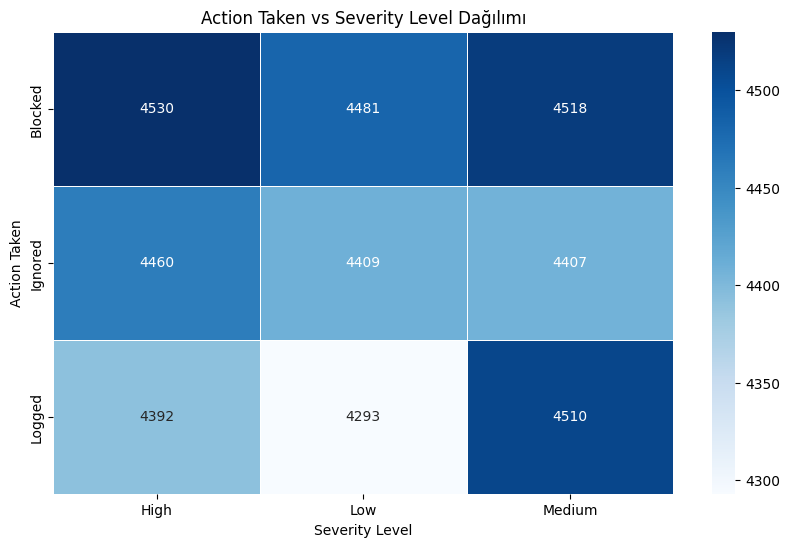

In [34]:
# 'Action Taken' ile 'Severity Level' değişkeninin ilişkisini inceleyelim
cross_tab = pd.crosstab(df['Action Taken'], df['Severity Level'])

# Çapraz tablonun çıktısını yazdıralım
print(cross_tab)

# Çapraz tabloyu görselleştirelim (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Action Taken vs Severity Level Dağılımı')
plt.show()

Action Taken sütununun oranlarını bulalım

In [35]:
# Kategorik sütundaki oranları hesaplayalım
column = 'Action Taken'
category_counts = df[column].value_counts(normalize=True)

# Kategorik değerlerin oranlarını yazdıralım
print(f"{column} sütununun oranları:")
print(category_counts)

Action Taken sütununun oranları:
Action Taken
Blocked    0.338225
Ignored    0.331900
Logged     0.329875
Name: proportion, dtype: float64


Ülkelere göre saldırı sayılarını bulalım

In [36]:
df_location = df.copy()  # Verinizi yükleyin (veri setinizi belirtin)

# Geo-location Data sütununda eksik verileri kontrol etme
df_location_new = df_location.dropna(subset=['Geo-location Data'])

# Geo-location Data sütunundaki ülke bilgilerini almak
df_location_new['Country'] = df_location_new['Geo-location Data'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else x)

# Ülkeler için sıklık dağılımı
country_attack_counts = df_location_new['Country'].value_counts()

# Kaç farklı ülkeye saldırı yapıldığını görmek
num_countries_attacked = country_attack_counts.shape[0]

# Sonuçları yazdırma
print(f"Saldırı düzenlenen ülke sayısı: {num_countries_attacked}")
print("\nÜlkeler ve Saldırı Sayıları:")
country_attack_counts

Saldırı düzenlenen ülke sayısı: 28

Ülkeler ve Saldırı Sayıları:


Country
Manipur              1498
Uttar Pradesh        1485
Gujarat              1483
Maharashtra          1474
Arunachal Pradesh    1472
Karnataka            1467
West Bengal          1465
Bihar                1462
Rajasthan            1460
Uttarakhand          1441
Haryana              1440
Nagaland             1439
Mizoram              1438
Jharkhand            1437
Kerala               1416
Sikkim               1410
Odisha               1410
Assam                1404
Meghalaya            1403
Chhattisgarh         1400
Goa                  1399
Andhra Pradesh       1399
Telangana            1393
Tamil Nadu           1393
Himachal Pradesh     1384
Tripura              1381
Punjab               1374
Madhya Pradesh       1373
Name: count, dtype: int64

Ülkelere göre saldırı tiplerini bulalım

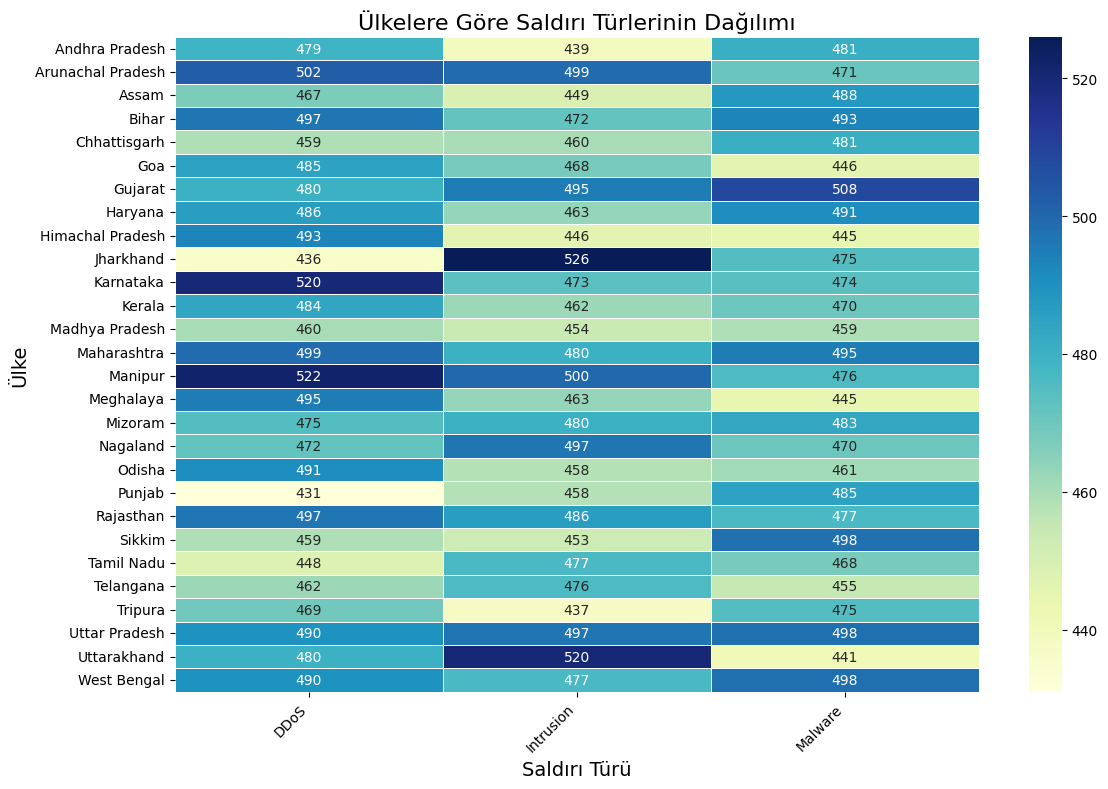

In [37]:
# Saldırı türlerini ve ülke bilgilerini kullanarak bir veri çerçevesi oluşturma
attack_by_country = df_location_new.groupby(['Country', 'Attack Type']).size().reset_index(name='Attack Count')

# Görselleştirme için pivot tablosu oluşturma (ülkeler x saldırı türleri)
attack_pivot = attack_by_country.pivot(index='Country', columns='Attack Type', values='Attack Count').fillna(0)

# Görselleştirme: Heatmap ile saldırıların dağılımını göstermek
plt.figure(figsize=(12, 8))
sns.heatmap(attack_pivot, annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5)

# Grafik başlığı ve etiketler
plt.title('Ülkelere Göre Saldırı Türlerinin Dağılımı', fontsize=16)
plt.xlabel('Saldırı Türü', fontsize=14)
plt.ylabel('Ülke', fontsize=14)
plt.xticks(rotation=45, ha='right')  # X etiketlerini döndürme
plt.yticks(rotation=0)  # Y etiketlerini düz tutma
plt.tight_layout()

# Grafik gösterimi
plt.show()

En fazla görülen saldırı türüne bakalım

In [38]:
# 'Attack Type' sütununda en fazla görülen saldırı türünü bulma
most_frequent_attack_type = df_location_new['Attack Type'].mode()[0]

# Sonucu yazdırma
print(f"En fazla görülen saldırı türü: {most_frequent_attack_type}")

En fazla görülen saldırı türü: DDoS


En fazla saldırı türünün seviyeleri

In [39]:
# 'Attack Type' sütununda en fazla görülen saldırı türünü bulma
most_frequent_attack_type = df_location_new['Attack Type'].mode()[0]

# En fazla görülen saldırı türü ile ilgili Severity Level'leri bulma
severity_levels_for_attack = df_location_new[df_location_new['Attack Type'] == most_frequent_attack_type]['Severity Level'].value_counts()

# Sonucu yazdırma
print(f"En fazla görülen saldırı türü: {most_frequent_attack_type}")
print("Bu saldırı türünün seviyeleri:")
print(severity_levels_for_attack)

En fazla görülen saldırı türü: DDoS
Bu saldırı türünün seviyeleri:
Severity Level
High      4523
Medium    4455
Low       4450
Name: count, dtype: int64


In [40]:
# 'Attack Type' sütununda en fazla görülen saldırı türünü bulma
most_frequent_attack_type = df_location_new['Attack Type'].mode()[0]

# En fazla görülen saldırı türü ile ilgili Severity Level'leri bulma
severity_levels_for_attack = df_location_new[df_location_new['Attack Type'] == most_frequent_attack_type]['Severity Level'].value_counts()

# Sonucu yazdırma
print(f"En fazla görülen saldırı türü: {most_frequent_attack_type}")
print("Bu saldırı türünün seviyeleri:")
print(severity_levels_for_attack)

En fazla görülen saldırı türü: DDoS
Bu saldırı türünün seviyeleri:
Severity Level
High      4523
Medium    4455
Low       4450
Name: count, dtype: int64


Ülkelere göre alınan eylem oranlarını bulalım

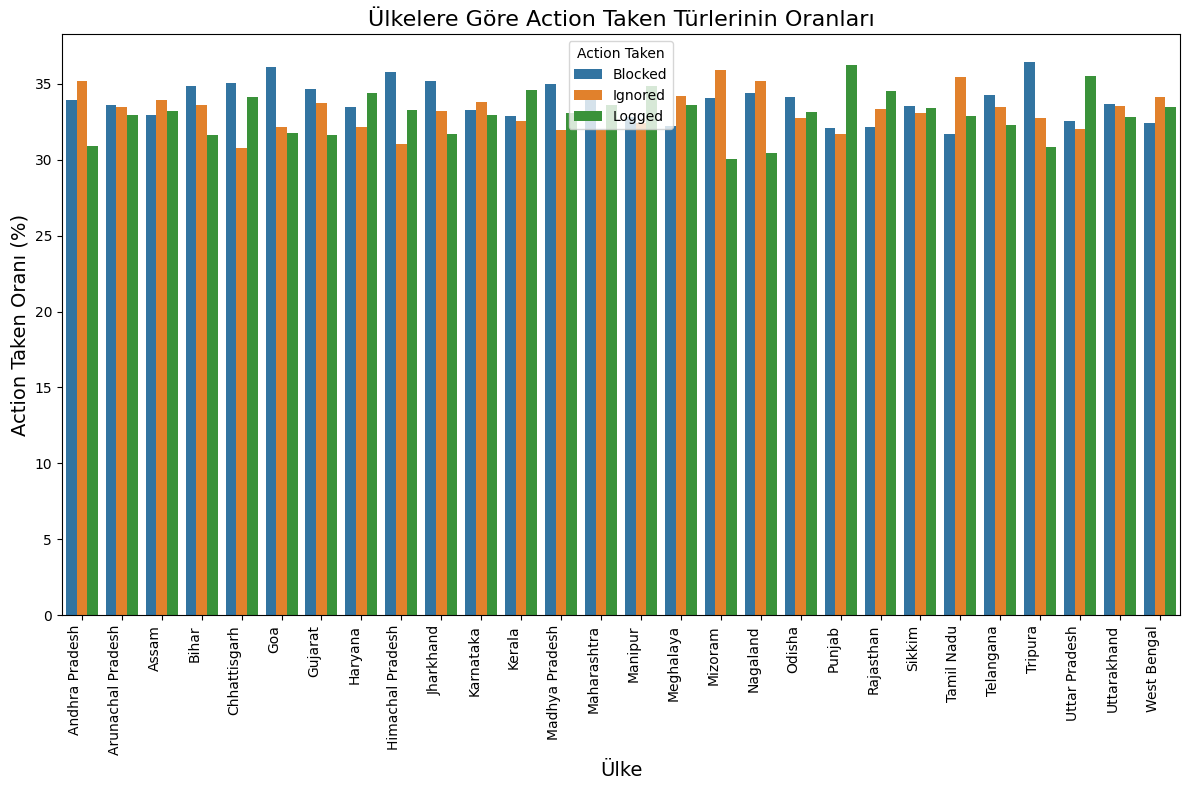

In [41]:
# Action Taken türlerinin dağılımını ülkelere göre gruplayalım
action_taken_by_country = df_location_new.groupby(['Country', 'Action Taken']).size().reset_index(name='Action Count')

# Action Taken'in oranlarını hesaplayalım
action_taken_by_country['Action Percentage'] = action_taken_by_country.groupby('Country')['Action Count'].transform(lambda x: x / x.sum() * 100)

# Görselleştirme: Her ülke için Action Taken oranlarını stacked bar chart olarak gösterelim
plt.figure(figsize=(12, 8))

# Stacked bar chart için seaborn barplot kullanma
sns.barplot(data=action_taken_by_country, x='Country', y='Action Percentage', hue='Action Taken')

# Grafik başlığı ve etiketler
plt.title('Ülkelere Göre Action Taken Türlerinin Oranları', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Action Taken Oranı (%)', fontsize=14)
plt.xticks(rotation=90, ha='right')  # X etiketlerini döndürme
plt.tight_layout()

# Grafik gösterimi
plt.show()

En çok high seviyeli saldırıları durduran ülkeler

<Figure size 1200x800 with 0 Axes>

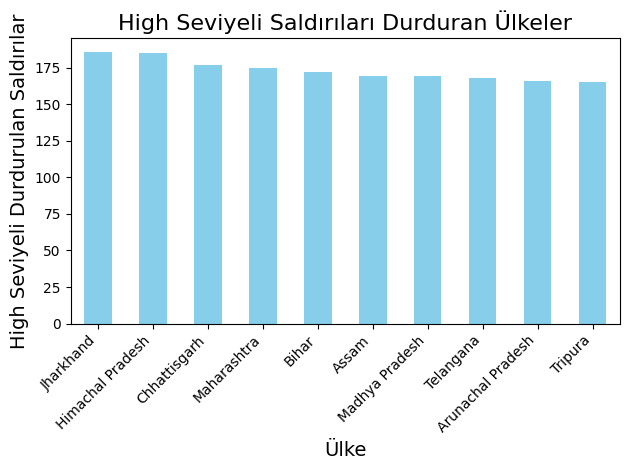

In [42]:
# "Severity Level" 'High' olan ve "Action Taken" 'Blocked' olan satırları filtreleme
high_severity_blocked = df_location_new[(df_location_new['Severity Level'] == 'High') & (df_location_new['Action Taken'] == 'Blocked')]

# Ülke bazında "High" seviyesi saldırıları durduranları sayma
blocked_by_country = high_severity_blocked['Country'].value_counts().reset_index()

# Kolonları anlamlı isimlerle değiştirme
blocked_by_country.columns = ['Country', 'High Severity Blocked Count']

# En çok saldırı durduran ilk 10 ülkeyi görselleştirelim
plt.figure(figsize=(12, 8))
blocked_by_country.head(10).plot(kind='bar', x='Country', y='High Severity Blocked Count', legend=False, color='skyblue')

# Grafik başlığı ve etiketler
plt.title('High Seviyeli Saldırıları Durduran Ülkeler', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('High Seviyeli Durdurulan Saldırılar', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Grafik gösterimi
plt.show()

<Figure size 1400x800 with 0 Axes>

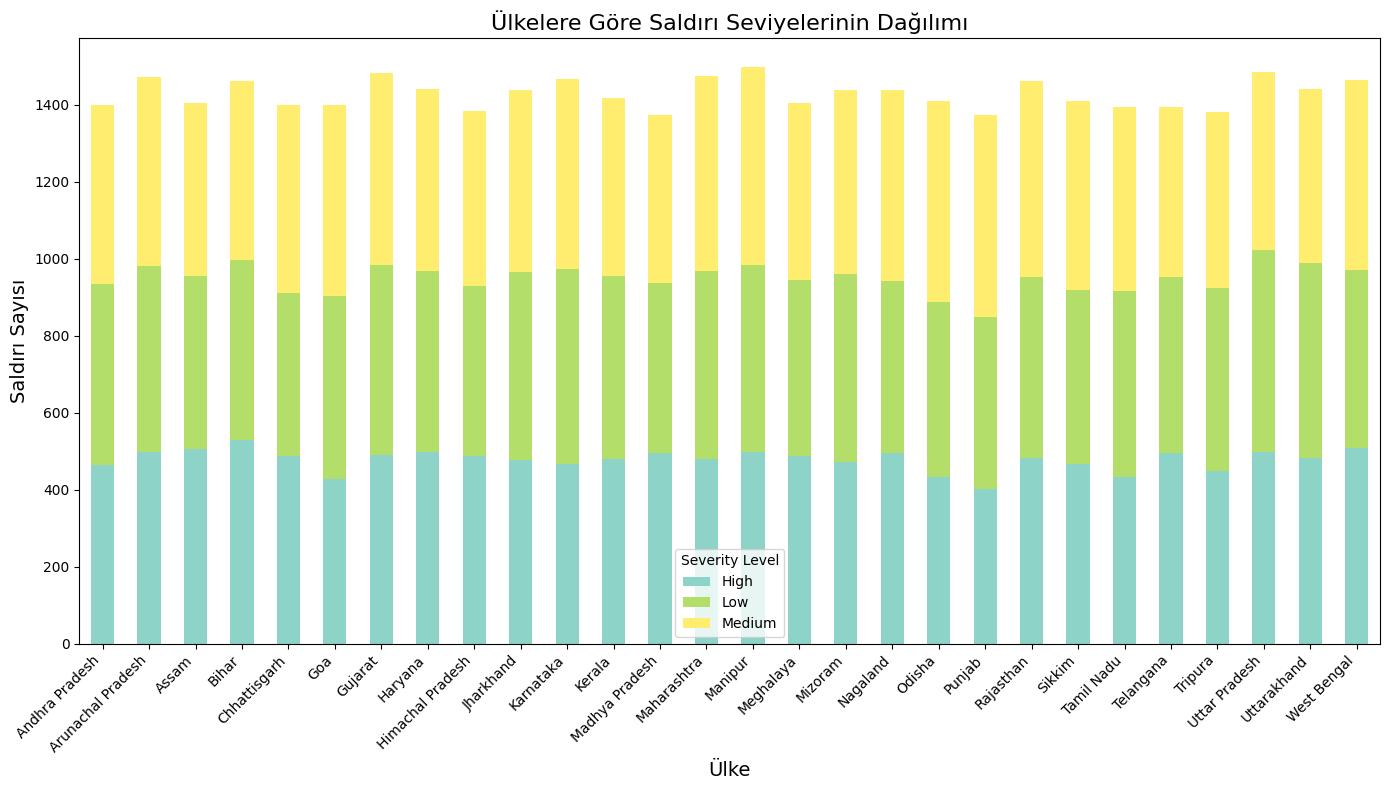

In [43]:
# Severity Level sütunundaki her bir seviyeye göre saldırıları ülkelere göre gruplama
severity_by_country = df_location_new.groupby(['Country', 'Severity Level'], observed=False).size().reset_index(name='Attack Count')

# Pivot tablosu oluşturma: Ülkeler ve Severity Level'ler arasındaki dağılım
severity_pivot = severity_by_country.pivot(index='Country', columns='Severity Level', values='Attack Count').fillna(0)

# Görselleştirme: Stacked bar chart ile ülkelere göre saldırı seviyelerinin dağılımı
plt.figure(figsize=(14, 8))
severity_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')

# Grafik başlığı ve etiketler
plt.title('Ülkelere Göre Saldırı Seviyelerinin Dağılımı', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Saldırı Sayısı', fontsize=14)
plt.xticks(rotation=45, ha='right')  # X etiketlerini döndürme
plt.tight_layout()

# Grafik gösterimi
plt.show()